# Atom-wise distances between matching AtomGroups

Here we compare the distances between alpha-carbons of the enzyme adenylate kinase in its open and closed conformations. ``distances.dist`` can be used to calculate distances between atom groups with the *same number of atoms* within them.

**Last executed:** Feb 06, 2020 with MDAnalysis 0.20.2-dev0

**Last updated:** January 2020

**Minimum version of MDAnalysis:** 0.19.0

**Packages required:**
    
* MDAnalysis (<a data-cite="michaud-agrawal_mdanalysis_2011" href="https://doi.org/10.1002/jcc.21787">Michaud-Agrawal *et al.*, 2011</a>, <a data-cite="gowers_mdanalysis_2016" href="https://doi.org/10.25080/Majora-629e541a-00e">Gowers *et al.*, 2016</a>)
* MDAnalysisTests
   
**Optional packages for visualisation:**

* [matplotlib](https://matplotlib.org)

In [1]:
import MDAnalysis as mda
from MDAnalysis.tests.datafiles import PDB_small, PDB_closed
from MDAnalysis.analysis import distances

import matplotlib.pyplot as plt
%matplotlib inline

## Loading files

The test files we will be working with here feature adenylate kinase (AdK), a phosophotransferase enzyme. (<a data-cite="beckstein_zipping_2009" href="https://doi.org/10.1016/j.jmb.2009.09.009">Beckstein *et al.*, 2009</a>) AdK has three domains: 

  * CORE
  * LID: an ATP-binding domain (residues 122-159)
  * NMP: an AMP-binding domain (residues 30-59)
  
The LID and NMP domains move around the stable CORE as the enzyme transitions between the opened and closed conformations.

In [2]:
u1 = mda.Universe(PDB_small)   # open AdK
u2 = mda.Universe(PDB_closed)  # closed AdK

## Calculating the distance between CA atoms

We select the atoms named 'CA' of each Universe.

In [3]:
ca1 = u1.select_atoms('name CA')
ca2 = u2.select_atoms('name CA')

`distances.dist` returns the residue numbers of both selections given. The `offset` keyword adds an offset to these residue numbers to help with comparison to each other and other file formats. Here we are happy with our residue numbers, so we use the default offset of 0. (See the documentation of `distances.dist` for more information.)

In [4]:
resids1, resids2, dist = distances.dist(ca1, ca2, 
                                        offset=0)  # for residue numbers

### Plotting

Below, we plot the distance over the residue numbers and highlight the LID and NMP domains of the protein. The LID domain in particular moves a significant distance between its opened and closed conformations.

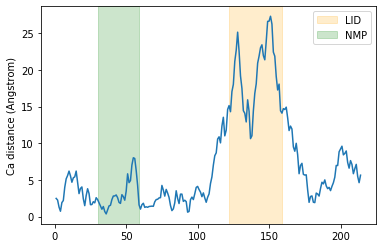

In [5]:
plt.plot(resids1, dist)
plt.ylabel('Ca distance (Angstrom)')
plt.axvspan(122, 159, zorder=0, alpha=0.2, color='orange', label='LID')
plt.axvspan(30, 59, zorder=0, alpha=0.2, color='green', label='NMP')
plt.legend()

## Calculating the distance with periodic boundary conditions

It is common to want to calculate distances with the minimum image convention. To do this, you *must* pass the unitcell dimensions of the system to the ``box`` keyword, **even if your Universe has dimensions defined**.

This should have the format: ``[lx, ly, lz, alpha, beta, gamma]``, where the first three numbers are the box lengths along each axis and the last three are the angles of the box.

In [6]:
resids1_box, resids2_box, dist_box = distances.dist(ca1, ca2, 
                                                    box=[10, 10, 10, 90, 90, 90])

### Plotting

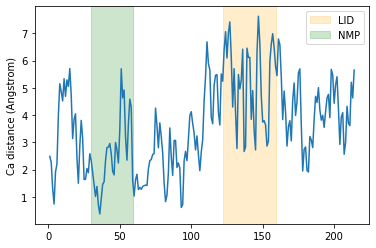

In [7]:
plt.plot(resids1_box, dist_box)
plt.ylabel('Ca distance (Angstrom)')
plt.axvspan(122, 159, zorder=0, alpha=0.2, color='orange', label='LID')
plt.axvspan(30, 59, zorder=0, alpha=0.2, color='green', label='NMP')
plt.legend()

## References

[1] Oliver Beckstein, Elizabeth&nbsp;J. Denning, Juan&nbsp;R. Perilla, and Thomas&nbsp;B. Woolf.
Zipping and <span class="bibtex-protected">Unzipping</span> of <span class="bibtex-protected">Adenylate</span> <span class="bibtex-protected">Kinase</span>: <span class="bibtex-protected">Atomistic</span> <span class="bibtex-protected">Insights</span> into the <span class="bibtex-protected">Ensemble</span> of <span class="bibtex-protected">Open</span>↔<span class="bibtex-protected">Closed</span> <span class="bibtex-protected">Transitions</span>.
<em>Journal of Molecular Biology</em>, 394(1):160–176, November 2009.
00107.
URL: <a href="https://linkinghub.elsevier.com/retrieve/pii/S0022283609011164">https://linkinghub.elsevier.com/retrieve/pii/S0022283609011164</a>, <a href="https://doi.org/10.1016/j.jmb.2009.09.009">doi:10.1016/j.jmb.2009.09.009</a>.

[2] Richard&nbsp;J. Gowers, Max Linke, Jonathan Barnoud, Tyler J.&nbsp;E. Reddy, Manuel&nbsp;N. Melo, Sean&nbsp;L. Seyler, Jan Domański, David&nbsp;L. Dotson, Sébastien Buchoux, Ian&nbsp;M. Kenney, and Oliver Beckstein.
<span class="bibtex-protected">MDAnalysis</span>: <span class="bibtex-protected">A</span> <span class="bibtex-protected">Python</span> <span class="bibtex-protected">Package</span> for the <span class="bibtex-protected">Rapid</span> <span class="bibtex-protected">Analysis</span> of <span class="bibtex-protected">Molecular</span> <span class="bibtex-protected">Dynamics</span> <span class="bibtex-protected">Simulations</span>.
<em>Proceedings of the 15th Python in Science Conference</em>, pages 98–105, 2016.
00152.
URL: <a href="https://conference.scipy.org/proceedings/scipy2016/oliver_beckstein.html">https://conference.scipy.org/proceedings/scipy2016/oliver_beckstein.html</a>, <a href="https://doi.org/10.25080/Majora-629e541a-00e">doi:10.25080/Majora-629e541a-00e</a>.

[3] Naveen Michaud-Agrawal, Elizabeth&nbsp;J. Denning, Thomas&nbsp;B. Woolf, and Oliver Beckstein.
<span class="bibtex-protected">MDAnalysis</span>: <span class="bibtex-protected">A</span> toolkit for the analysis of molecular dynamics simulations.
<em>Journal of Computational Chemistry</em>, 32(10):2319–2327, July 2011.
00778.
URL: <a href="http://doi.wiley.com/10.1002/jcc.21787">http://doi.wiley.com/10.1002/jcc.21787</a>, <a href="https://doi.org/10.1002/jcc.21787">doi:10.1002/jcc.21787</a>.